In [1]:
import pandas as pd

In [2]:
personality_test = pd.read_csv("Personality.csv")
personality_test.head()

,Timestamp,Name,I enjoy playing video games,I enjoy playing sports,I enjoy watching sports,I enjoy artistic activities,I enjoy listening to music,I enjoy going to concerts,I consider myself a risk-taker,"I prefer smaller, more intimate groups over large social gatherings",...,I am competitive,"When planning, I prefer spontaneous activities over structured events","As an attendee, I prefer spontaneous activities over structured events","I am open to new experiences, even if it's not something I’d typically enjoy",I prefer to take charge in group situations over “going with the flow”,My actions are moved by emotion,My actions are moved by logic,What are you most excited to see in the remainder of the school year in regards to CSA?,Unnamed: 19,Unnamed: 20
0,7/13/2024 16:42:15,Jae Trinh,6,6,3,7,7,7,7,4,...,7,2,3,7,7,3,5,I want to give the megateam the chance to grow...,NaN,NaN
1,7/13/2024 16:44:01,Ruth Jasadiredja,2,6,6,5,7,6,4,6,...,6,2,5,6,6,3,6,Getting to meet new people and become better f...,NaN,NaN
2,7/13/2024 16:55:35,Jaden Oca,4,2,5,6,7,6,4,6,...,7,6,6,5,5,6,4,I'm most excited to watch my team grow through...,NaN,NaN
3,7/13/2024 18:01:48,Kane,7,7,6,3,6,4,4,5,...,5,2,4,5,4,4,6,Putting on banger events,NaN,NaN
4,7/13/2024 18:12:39,Lucy Long,3,4,3,6,7,6,7,5,...,5,2,3,6,5,3,5,Meeting new people and watching everyone grow!!,NaN,NaN


In [16]:
personality_test['Timestamp'] = pd.to_datetime(personality_test['Timestamp'])

# Sort by 'Submission Date' to get the latest submissions and remove duplicates based on 'Name'
# 'keep='last'' ensures only the most recent submission is retained
personality_test = personality_test.sort_values(by='Timestamp').drop_duplicates(subset='Name', keep='last')
personality_test = personality_test[personality_test['Name'].str.lower() != 'alison xiao']

# Display the count of unique names after removing 'alison xiao'
print(personality_test['Name'].value_counts())

Name
Kane                 1
Ryan Kha             1
Jimmy Chang          1
Kody Chu             1
Zachary Yang         1
Marco Balatbat       1
Athena Paz           1
Alex Wu              1
Peter                1
Samantha Wong        1
alison x             1
Emily Chen           1
Yundi Zeng           1
Jacob Pham           1
Bao Nguyen           1
Maple Yeh            1
Keiko Cheung         1
Reilly Mize          1
Julia Chen           1
Dominic Hidayat      1
Keilon Carrier       1
Hecate Hu            1
Greta choi           1
Tristan              1
Eileen Ye            1
Lucy Long            1
Haylie               1
Grace Zhou           1
Leia Bowden          1
Delaney Tao          1
Jaden Oca            1
Ruth Jasadiredja     1
Brian Zhou           1
Brianna Luty         1
Christopher Jin      1
sarah ward           1
ryan                 1
Sophia Bocek         1
Jaden Cheung         1
Nick Ma              1
Joseph Sankey        1
Ibrahim Mohaweche    1
Kyle Liu             1
Zolee 

In [17]:
len(personality_test)

47

In [18]:
personality_test = personality_test.loc[:, ~personality_test.columns.str.contains('^Unnamed')]

# Define new column names with one-word representations for each question
new_column_names = {
    'Timestamp': 'Timestamp',
    'Name': 'Name',
    'I enjoy playing video games': 'Gaming',
    'I enjoy playing sports': 'Sports',
    'I enjoy watching sports': 'WatchSports',
    'I enjoy artistic activities ': 'Artistic',
    'I enjoy listening to music': 'Music',
    'I enjoy going to concerts': 'Concerts',
    'I consider myself a risk-taker': 'RiskTaker',
    'I prefer smaller, more intimate groups over large social gatherings': 'SmallGroups',
    'I prefer indoor activities over outdoor activities': 'Indoor',
    'I am competitive ': 'Competitive',
    'When planning, I prefer spontaneous activities over structured events': 'SpontaneousPlanning',
    'As an attendee, I prefer spontaneous activities over structured events': 'SpontaneousAttending',
    'I am open to new experiences, even if it\'s not something I’d typically enjoy ': 'OpenExperience',
    'I prefer to take charge in group situations over “going with the flow”': 'TakeCharge',
    'My actions are moved by emotion ': 'EmotionDriven',
    'My actions are moved by logic': 'LogicDriven',
    'What are you most excited to see in the remainder of the school year in regards to CSA? ': 'Excitement'
}

# Rename columns
personality_test = personality_test.rename(columns=new_column_names)

# Display the updated column names
print(personality_test.columns)

Index(['Timestamp', 'Name', 'Gaming', 'Sports', 'WatchSports', 'Artistic',
       'Music', 'Concerts', 'RiskTaker', 'SmallGroups', 'Indoor',
       'Competitive', 'SpontaneousPlanning', 'SpontaneousAttending',
       'OpenExperience', 'TakeCharge', 'EmotionDriven', 'LogicDriven',
       'Excitement', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
clustering_data = personality_test.select_dtypes(include=['number']).copy()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with K=4
kmeans = KMeans(n_clusters=3, random_state=42)
personality_test['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Display the first few rows with cluster labels, including names
print(personality_test[['Name', 'Cluster']].head())

           Name  Cluster
3         Kane         0
7     Eileen Ye        1
8        Haylie        1
9    Grace Zhou        2
10  Leia Bowden        0


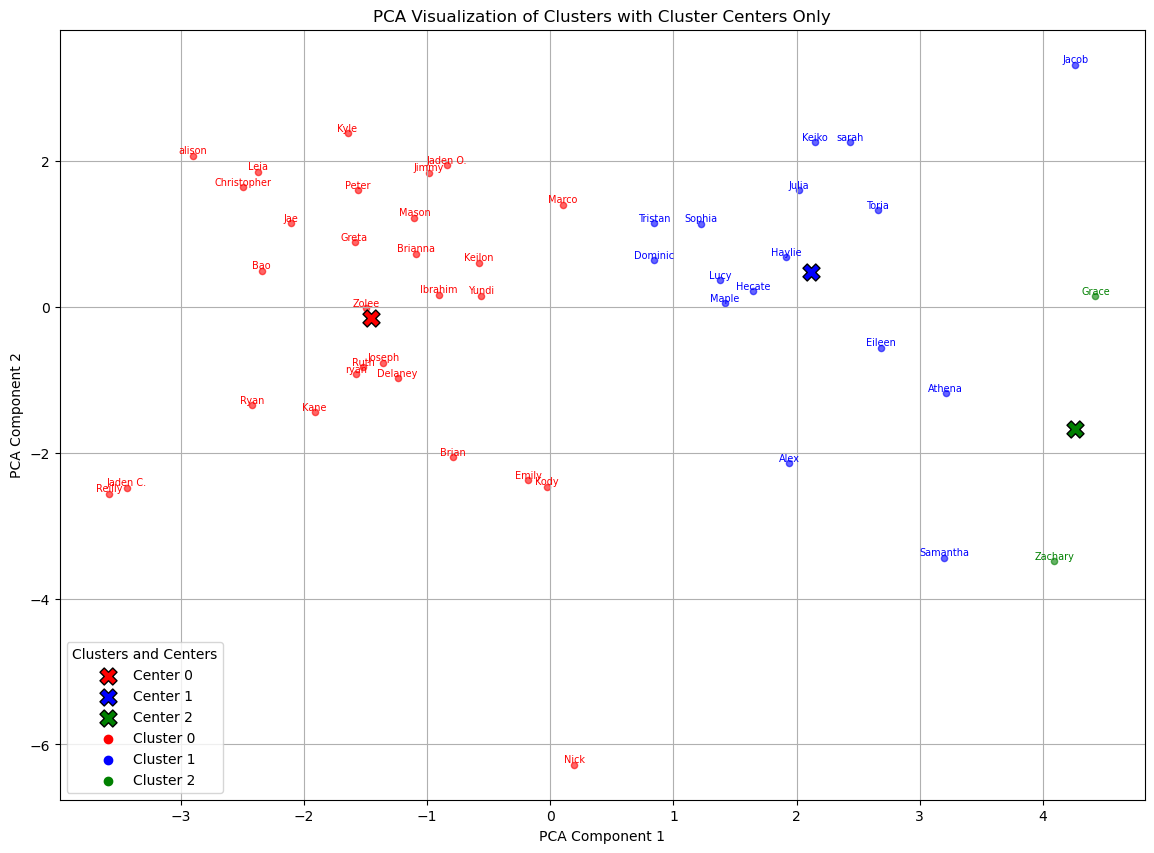

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(personality_test.select_dtypes(include=['number']).copy())

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
personality_test['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

# Add PCA results to the DataFrame
personality_test['PCA1'] = clustering_data_pca[:, 0]
personality_test['PCA2'] = clustering_data_pca[:, 1]

# Define colors for each cluster
colors = ['red', 'blue', 'green']
plt.figure(figsize=(14, 10))  # Larger plot size for better visibility

# Plot each person with a point and their name, colored by cluster
for i in range(len(personality_test)):
    cluster = personality_test['Cluster'].iloc[i]
    # Check if the name starts with "Jaden" and format as "Jaden O." if so
    name_parts = personality_test['Name'].iloc[i].split()
    if name_parts[0] == "Jaden":
        name_to_plot = f"{name_parts[0]} {name_parts[1][0]}."
    else:
        name_to_plot = name_parts[0]  # Only use first name for others
    
    plt.scatter(personality_test['PCA1'].iloc[i], personality_test['PCA2'].iloc[i], 
                color=colors[cluster], s=20, alpha=0.6)  # Plot a marker for visibility
    plt.text(personality_test['PCA1'].iloc[i], personality_test['PCA2'].iloc[i],
             name_to_plot, color=colors[cluster], fontsize=7, ha='center', va='bottom')  # Smaller font size

# Plot cluster centers without ellipses
for idx in range(3):  # Iterate over each cluster
    cluster_points = personality_test[personality_test['Cluster'] == idx][['PCA1', 'PCA2']]
    center_x, center_y = cluster_points.mean()
    plt.scatter(center_x, center_y, color=colors[idx], s=150, marker='X', edgecolor='black', label=f'Center {idx}')

# Adding legend
for i, color in enumerate(colors):
    plt.scatter([], [], color=color, label=f'Cluster {i}')
plt.legend(title='Clusters and Centers', loc='best')

# Enhancing the plot aesthetics
plt.title('PCA Visualization of Clusters with Cluster Centers Only')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


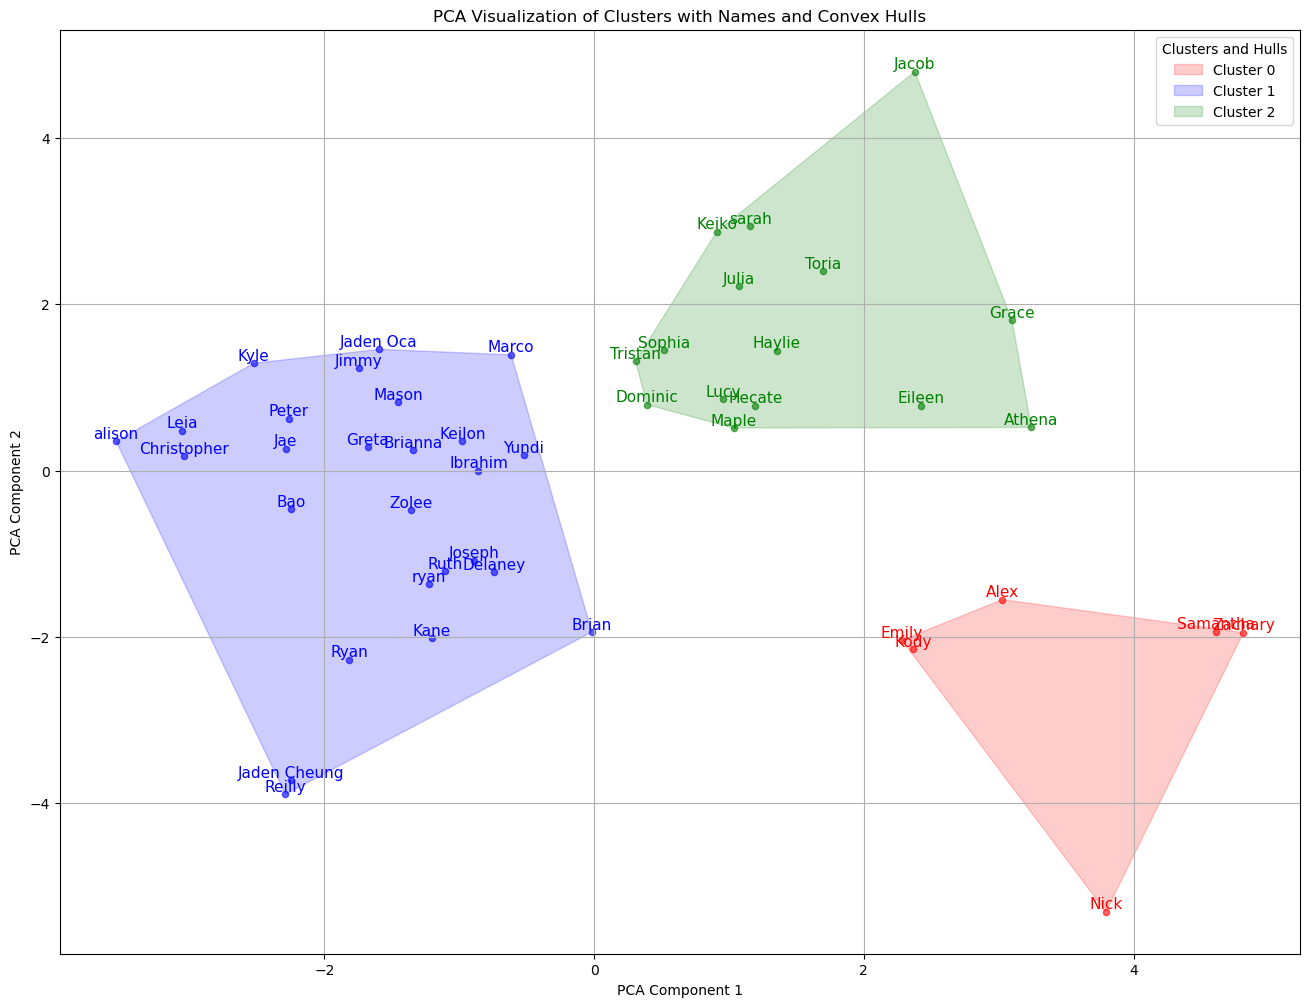

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import numpy as np

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(personality_test.select_dtypes(include=['number']).copy())

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
personality_test['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

# Add PCA results to the DataFrame
personality_test['PCA1'] = clustering_data_pca[:, 0]
personality_test['PCA2'] = clustering_data_pca[:, 1]

# Define colors for each cluster
colors = ['red', 'blue', 'green']
plt.figure(figsize=(16, 12))  # Larger plot size for better visibility

# Plot points, names, and clusters with convex hulls
for cluster_idx in range(3):  # Adjust for the number of clusters
    cluster_points = personality_test[personality_test['Cluster'] == cluster_idx][['PCA1', 'PCA2']].values
    cluster_names = personality_test[personality_test['Cluster'] == cluster_idx]['Name'].values
    
    # Scatter the points with names
    for point, name in zip(cluster_points, cluster_names):
        # Check if the first name is "Jaden"
        if name.split()[0] == "Jaden":
            name_to_plot = name  # Full name for Jaden
        else:
            name_to_plot = name.split()[0]  # Only first name for others
        
        plt.scatter(point[0], point[1], color=colors[cluster_idx], s=20, alpha=0.6)
        plt.text(point[0], point[1], name_to_plot, fontsize=11, color=colors[cluster_idx], ha='center', va='bottom')
    
    # Plot convex hull around the points in the cluster
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=colors[cluster_idx], alpha=0.2, label=f'Cluster {cluster_idx}')

# Adding legend
plt.legend(title='Clusters and Hulls', loc='best')

# Enhancing the plot aesthetics
plt.title('PCA Visualization of Clusters with Names and Convex Hulls')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [27]:
pca_loadings = pd.DataFrame(pca.components_.T, 
                            columns=['PCA1', 'PCA2'], 
                            index=personality_test.select_dtypes(include=['number']).columns)

# Display PCA loadings
print(pca_loadings)

                              PCA1          PCA2
Gaming               -1.584503e-01 -1.677625e-02
Sports               -3.862909e-01 -2.117942e-03
WatchSports          -3.254621e-01  5.388984e-02
Artistic              1.206721e-01  1.652589e-01
Music                -1.173391e-02  1.465321e-01
Concerts             -4.278793e-02  3.579696e-01
RiskTaker            -5.500314e-02  2.958220e-01
SmallGroups           9.938733e-02 -1.129423e-01
Indoor                2.136437e-01 -1.129148e-01
Competitive          -3.057978e-01  9.792327e-04
SpontaneousPlanning  -4.924479e-02  3.156376e-01
SpontaneousAttending  1.153068e-01  3.538493e-01
OpenExperience       -1.832656e-01  1.712492e-01
TakeCharge           -2.014895e-01  6.286977e-02
EmotionDriven         7.597470e-02  3.477612e-01
LogicDriven          -2.289474e-01 -2.150451e-01
Cluster               4.243468e-01  1.464566e-02
PCA1                  4.722219e-01 -1.799325e-07
PCA2                  1.403362e-07  5.304301e-01


Cluster                      0         1         2
Gaming                5.000000  6.038462  4.666667
Sports                3.500000  6.000000  3.200000
WatchSports           2.500000  5.230769  2.800000
Artistic              4.333333  4.884615  6.000000
Music                 6.333333  6.653846  6.533333
Concerts              2.833333  5.269231  5.600000
RiskTaker             2.833333  4.384615  4.266667
SmallGroups           5.500000  5.000000  5.200000
Indoor                5.333333  4.576923  5.266667
Competitive           4.000000  6.269231  4.000000
SpontaneousPlanning   1.833333  3.346154  3.600000
SpontaneousAttending  2.166667  3.769231  4.800000
OpenExperience        4.000000  6.076923  5.800000
TakeCharge            3.666667  4.807692  3.800000
EmotionDriven         2.666667  4.230769  4.600000
LogicDriven           5.500000  5.307692  4.600000
PCA1                  3.482885 -1.640248  1.449942
PCA2                 -2.488973 -0.404843  1.697318


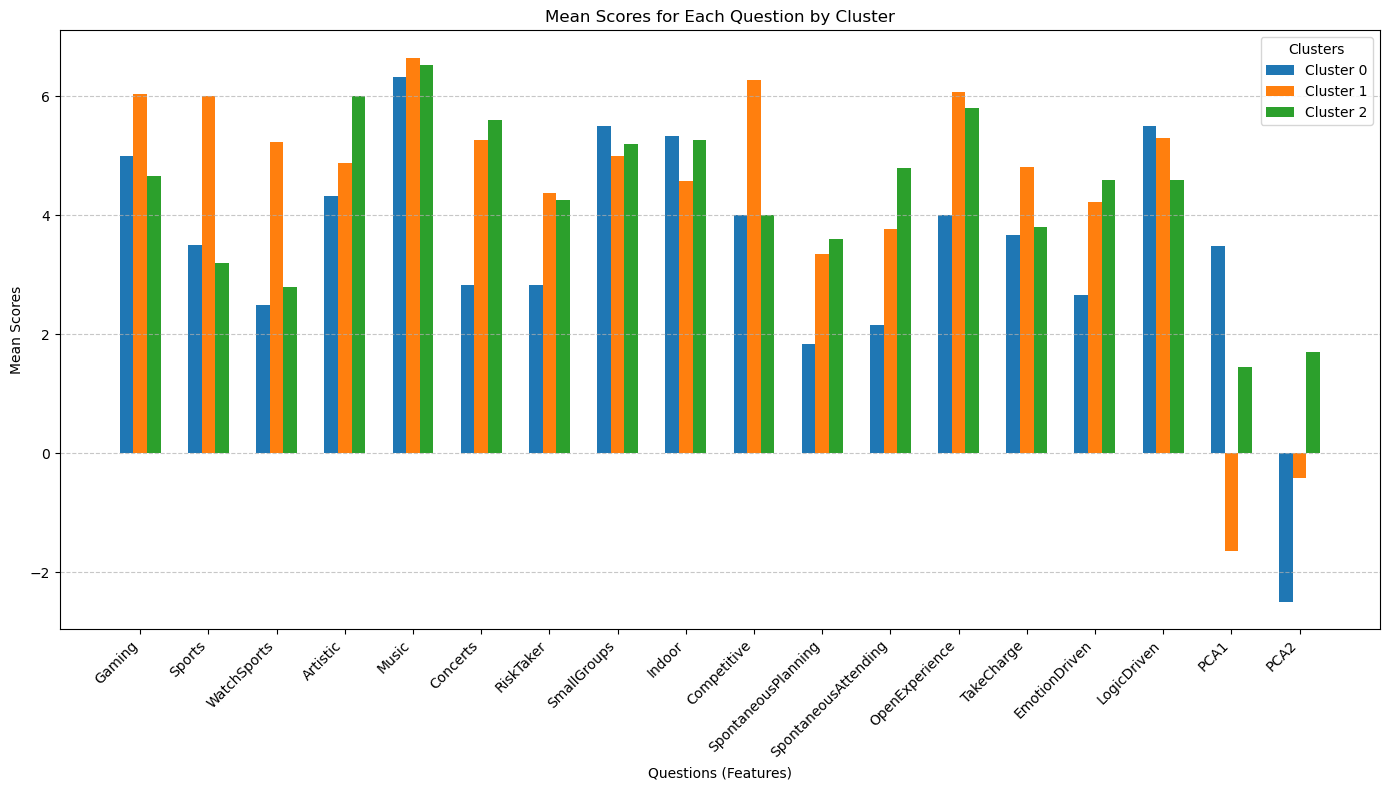

In [32]:
# Ensure numeric columns are used for analysis
numeric_columns = personality_test.select_dtypes(include=['number'])

# Add the 'Cluster' column back for grouping
numeric_columns['Cluster'] = personality_test['Cluster']

# Calculate the means for each cluster and feature
cluster_means = numeric_columns.groupby('Cluster').mean()

# Transpose the DataFrame for easier plotting (features as rows)
cluster_means_transposed = cluster_means.T
print(cluster_means_transposed)
# Plot the means of each feature for the three clusters as a histogram
plt.figure(figsize=(14, 8))

# Number of clusters and features
num_clusters = cluster_means_transposed.columns.size
bar_width = 0.2  # Width of each bar
x = np.arange(cluster_means_transposed.index.size)  # Positions for the bars

# Plot each cluster as a separate set of bars
for i, cluster in enumerate(cluster_means_transposed.columns):
    plt.bar(
        x + i * bar_width,
        cluster_means_transposed[cluster],
        width=bar_width,
        label=f'Cluster {cluster}'
    )

# Enhance the plot
plt.title('Mean Scores for Each Question by Cluster')
plt.xlabel('Questions (Features)')
plt.ylabel('Mean Scores')
plt.xticks(x + bar_width, cluster_means_transposed.index, rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Clusters')
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
personality_test = pd.read_csv("Personality.csv")
print(personality_test.iloc[:,-3].head())
# Extract responses from the last column
responses = personality_test.iloc[:, -3].dropna()  # Ensure no NaN values
all_text = " ".join(responses)
print(all_text)
# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Lemmatize the text
doc = nlp(all_text)
lemmatized_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Responses", fontsize=16)
plt.show()


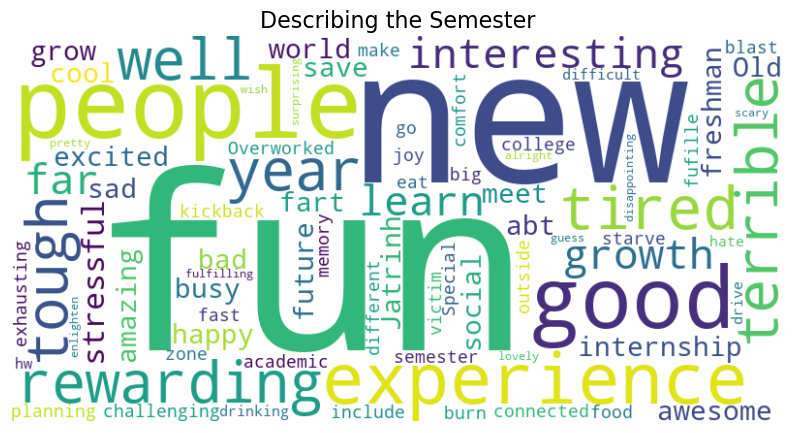

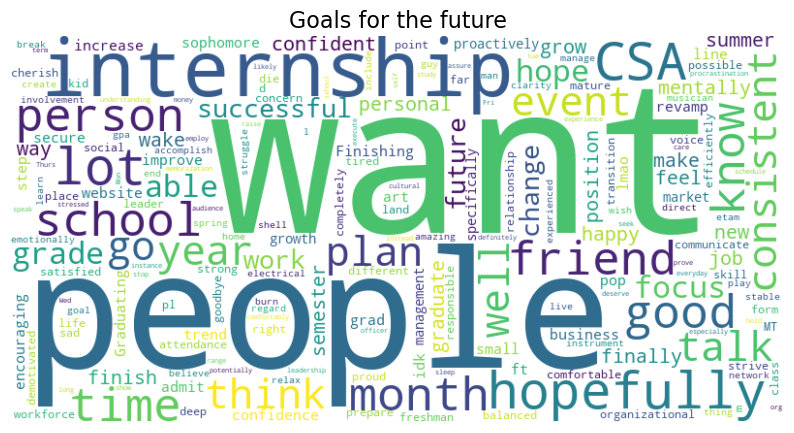

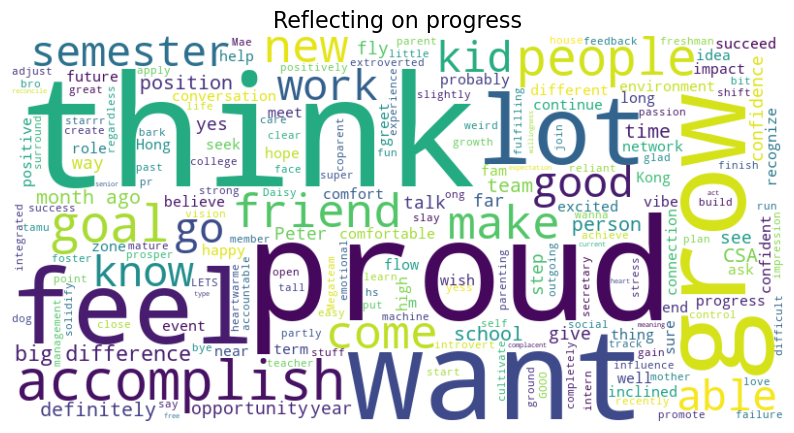

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Load the dataset
file_path = "reflection.csv"  # Update with the correct path to your CSV file
reflection_data = pd.read_csv(file_path)

# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(column_data):
    """Lemmatize and clean text from a column."""
    all_text = " ".join(column_data.dropna().astype(str))
    doc = nlp(all_text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Generate lemmatized text for columns 3, 4, and combined 5 & 6
text_col3 = preprocess_text(reflection_data.iloc[:, 2])
text_col4 = preprocess_text(reflection_data.iloc[:, 3])
text_col5_6 = preprocess_text(reflection_data.iloc[:, 4].fillna('') + " " + reflection_data.iloc[:, 5].fillna(''))

# Generate word clouds
wordcloud_col3 = WordCloud(width=800, height=400, background_color='white').generate(text_col3)
wordcloud_col4 = WordCloud(width=800, height=400, background_color='white').generate(text_col4)
wordcloud_col5_6 = WordCloud(width=800, height=400, background_color='white').generate(text_col5_6)

# Display word clouds in separate plots
# Plot for Column 3
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_col3, interpolation='bilinear')
plt.axis('off')
plt.title("Describing the Semester", fontsize=16)
plt.show()

# Plot for Column 4
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_col4, interpolation='bilinear')
plt.axis('off')
plt.title("Goals for the future", fontsize=16)
plt.show()

# Plot for Combined Column 5 & 6
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_col5_6, interpolation='bilinear')
plt.axis('off')
plt.title("Reflecting on progress", fontsize=16)
plt.show()
